In [296]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import glob
import os
import math
from os import listdir
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
from tqdm import tqdm 
import random
import sys
import importlib
'''
This script plots the optimals from the numerical simulations onto the data
'''

'\nThis script plots the optimals from the numerical simulations onto the data\n'

## Initial Thangs

In [297]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Exp1\\Simulation_Figures\\Group\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

## Pickle and Load Functions

Pickle data

In [298]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject_object_dict = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

Load Functions

In [299]:
# Insert to load the model objects (bc this is where the Optimal_Simulation object is stored: "Simulation_Object.py")
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\\') 
from plot_functions import *
from Subject_Object import *
import Simulation_Object
from Simulation_Object import *
importlib.reload(Simulation_Object) # Reloads so I don't have to restart kernel if I change a function in Simulation_Object
from Simulation_Object import *

Run individual simulations

In [300]:
# if "subject_simulation_dict_sd50" not in locals():
#     subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12','Sub13','Sub14']
#     subject_simulation_dict_sd50 = {}
#     subject_simulation_dict_sd150 = {}
#     subject_experiment_sim_results_dict = {}

#     for subname in subnames:
#         print(subname)
#         o = subject_object_dict[subname]
#         temp1 = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, 
#                                                  decision_to_action_delay = 80,
#                                                 timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                                 agent_uncertainty = 50)
#         temp2 = Optimal_Decision_Time_Simulation(sub_name = subname,reaction_time_mean = o.reaction_time_minus_sd, movement_time_mean = o.reaction_movement_time_mean, 
#                                                  decision_to_action_delay = 80,
#                                                 timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
#                                                 agent_uncertainty = 150)
#         # Place object in dictionary
#         subject_simulation_dict_sd50.update({subname:temp1})
#         subject_simulation_dict_sd150.update({subname:temp2})
        
#         # Put the two objects of different agent stds together into another object
#         temp = Simulation_Experiment_Results([subject_simulation_dict_sd50[subname],subject_simulation_dict_sd150[subname]])
#         # Put the combined sims of just the experiment times into a dictionary with the subname as the key
#         subject_experiment_sim_results_dict.update({subname:temp})

Run group simulations

In [301]:
o = group
group_sim_50 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - 1.5*o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        decision_to_action_delay_mean = 100,decision_to_action_delay_uncertainty = 40,timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 50)
group_sim_150 = Optimal_Decision_Time_Simulation(NUM_TRIALS = 10000,sub_name = 'Group',reaction_time_mean = o.reaction_time_mean - 1.5*o.reaction_time_sd, movement_time_mean = o.reaction_movement_time_median - o.reaction_movement_time_sd, 
                                        decision_to_action_delay_mean = 100,decision_to_action_delay_uncertainty = 40, timing_uncertainty= o.coincidence_reach_time_sd, reaction_uncertainty = o.reaction_time_sd, movement_uncertainty = o.reaction_movement_time_sd,
                                        agent_uncertainty = 150)

# Put the sims into one object together
group_experiment_sim_results = Simulation_Experiment_Results([group_sim_50,group_sim_150])
save_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\\'
# dill.dump(group_experiment_sim_results,open(save_path + f'group_experiment_sim_results.pkl', 'wb'))

## Plots

### Histograms

Player and agent Leave times

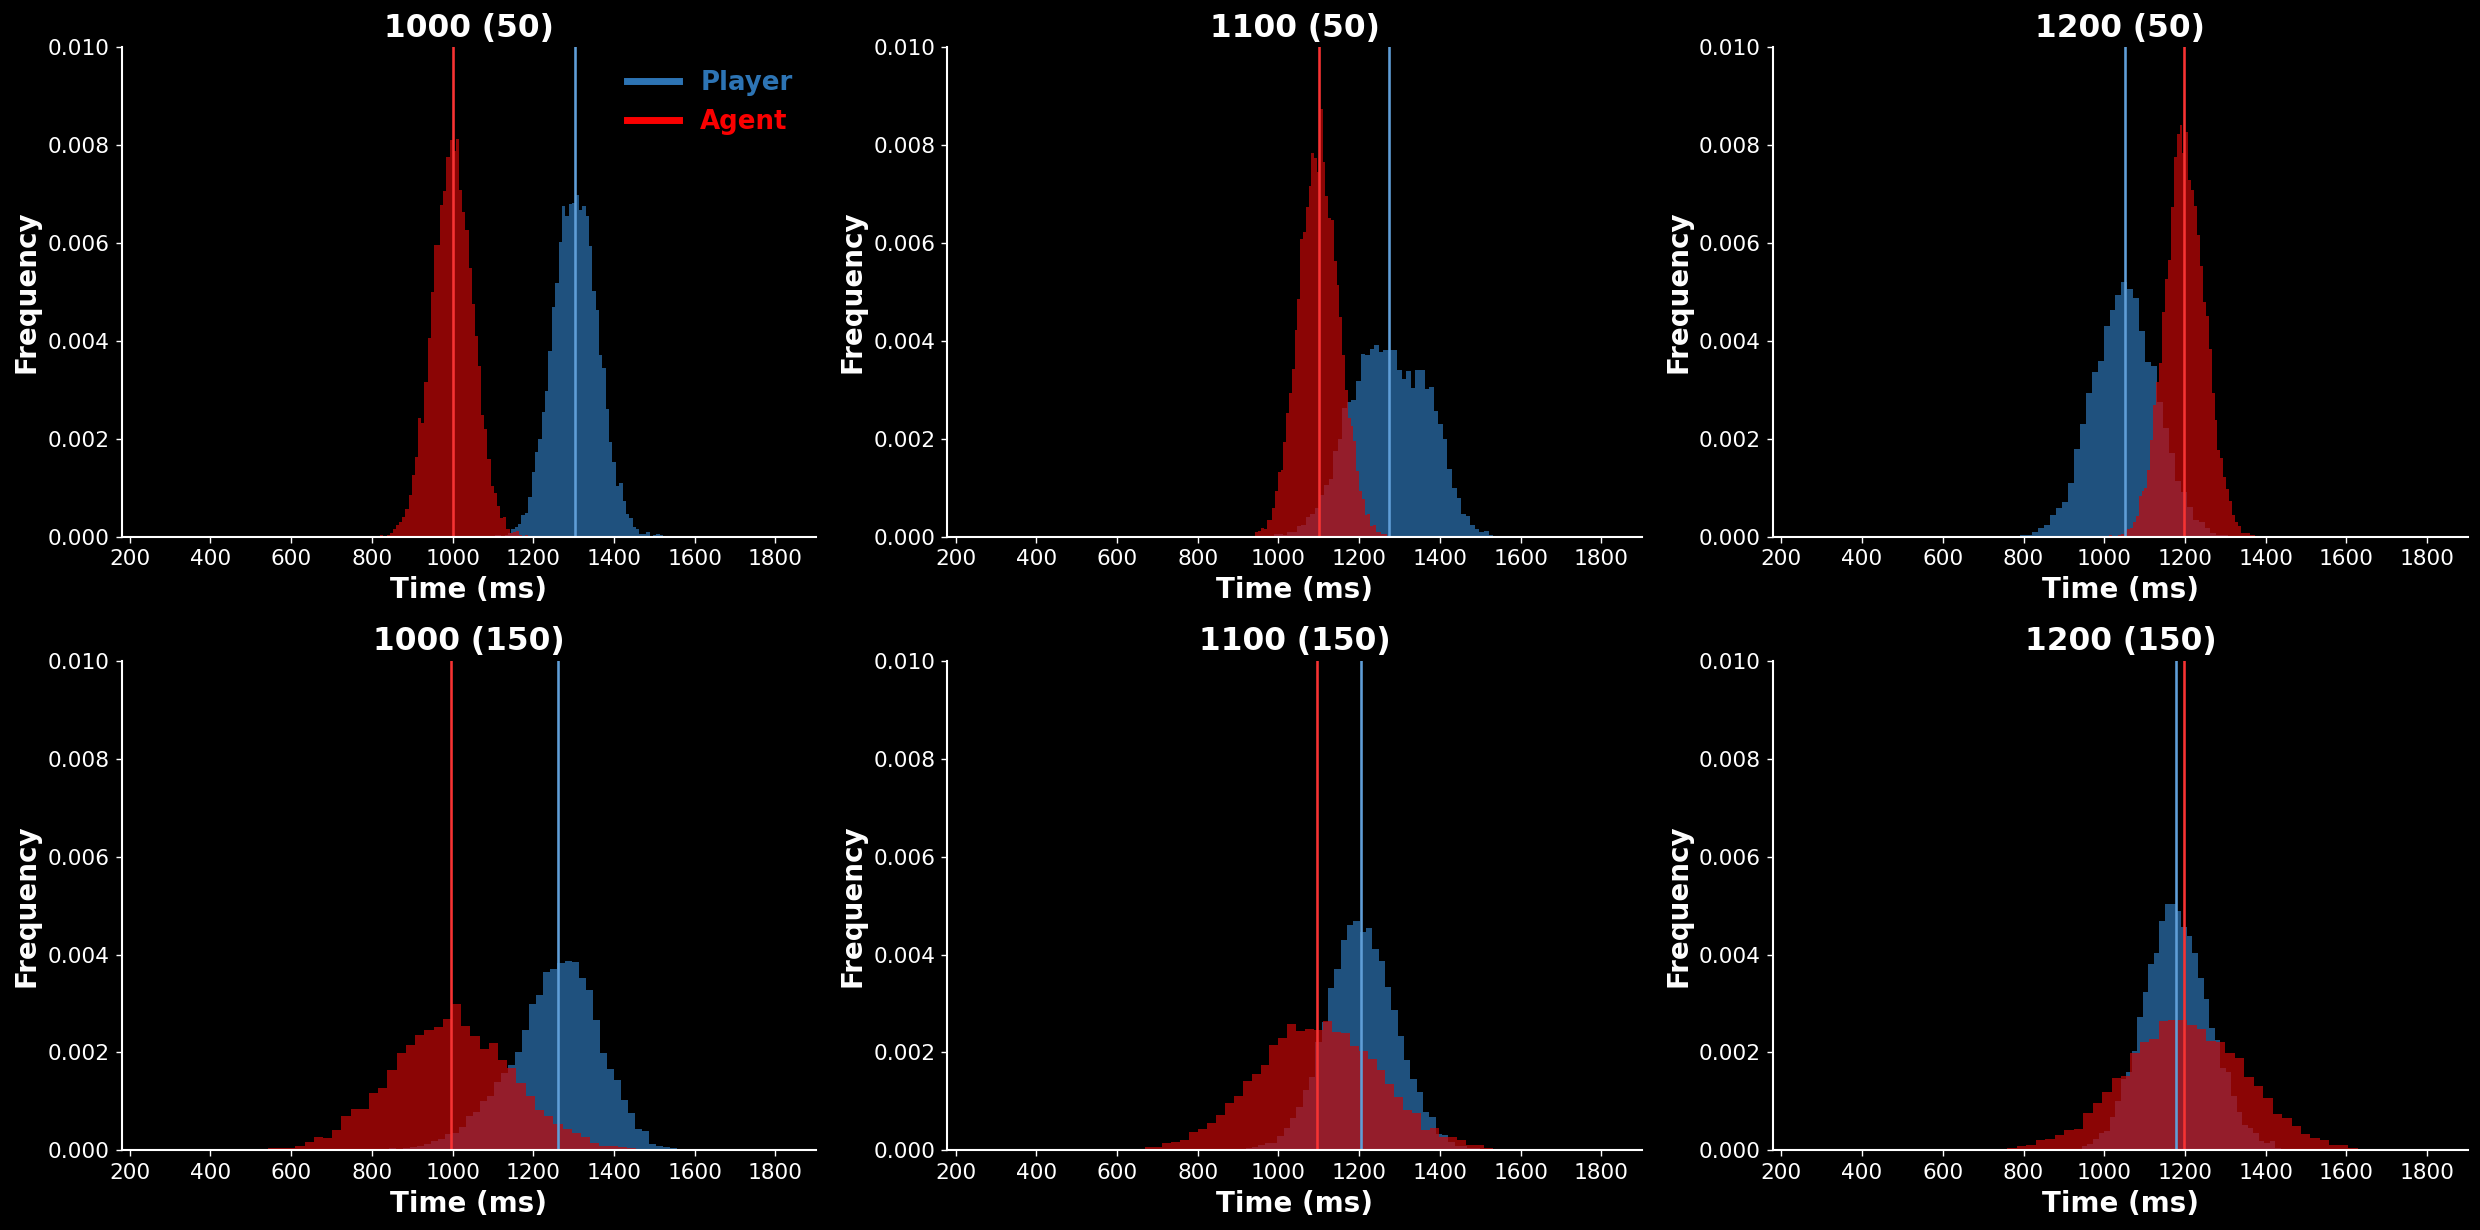

In [305]:
fig,axs = group_experiment_sim_results.plot_histogram(['Player Leave Target Times','Agent Decision Times'])
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
plt.setp(axs, ylim=(0,0.01))
fig.tight_layout()
dv.Custom_Legend(axs[0,0],labels=['Player','Agent'],colors=[wheel.seth_blue,wheel.seth_red],fontsize=15)
if save:
    plt.savefig(SAVE_PATH+'player_and_agent_leave_time_distributions', dpi = 400, transparent = True)
    
plt.show()

Player Minus Agent Leave Times

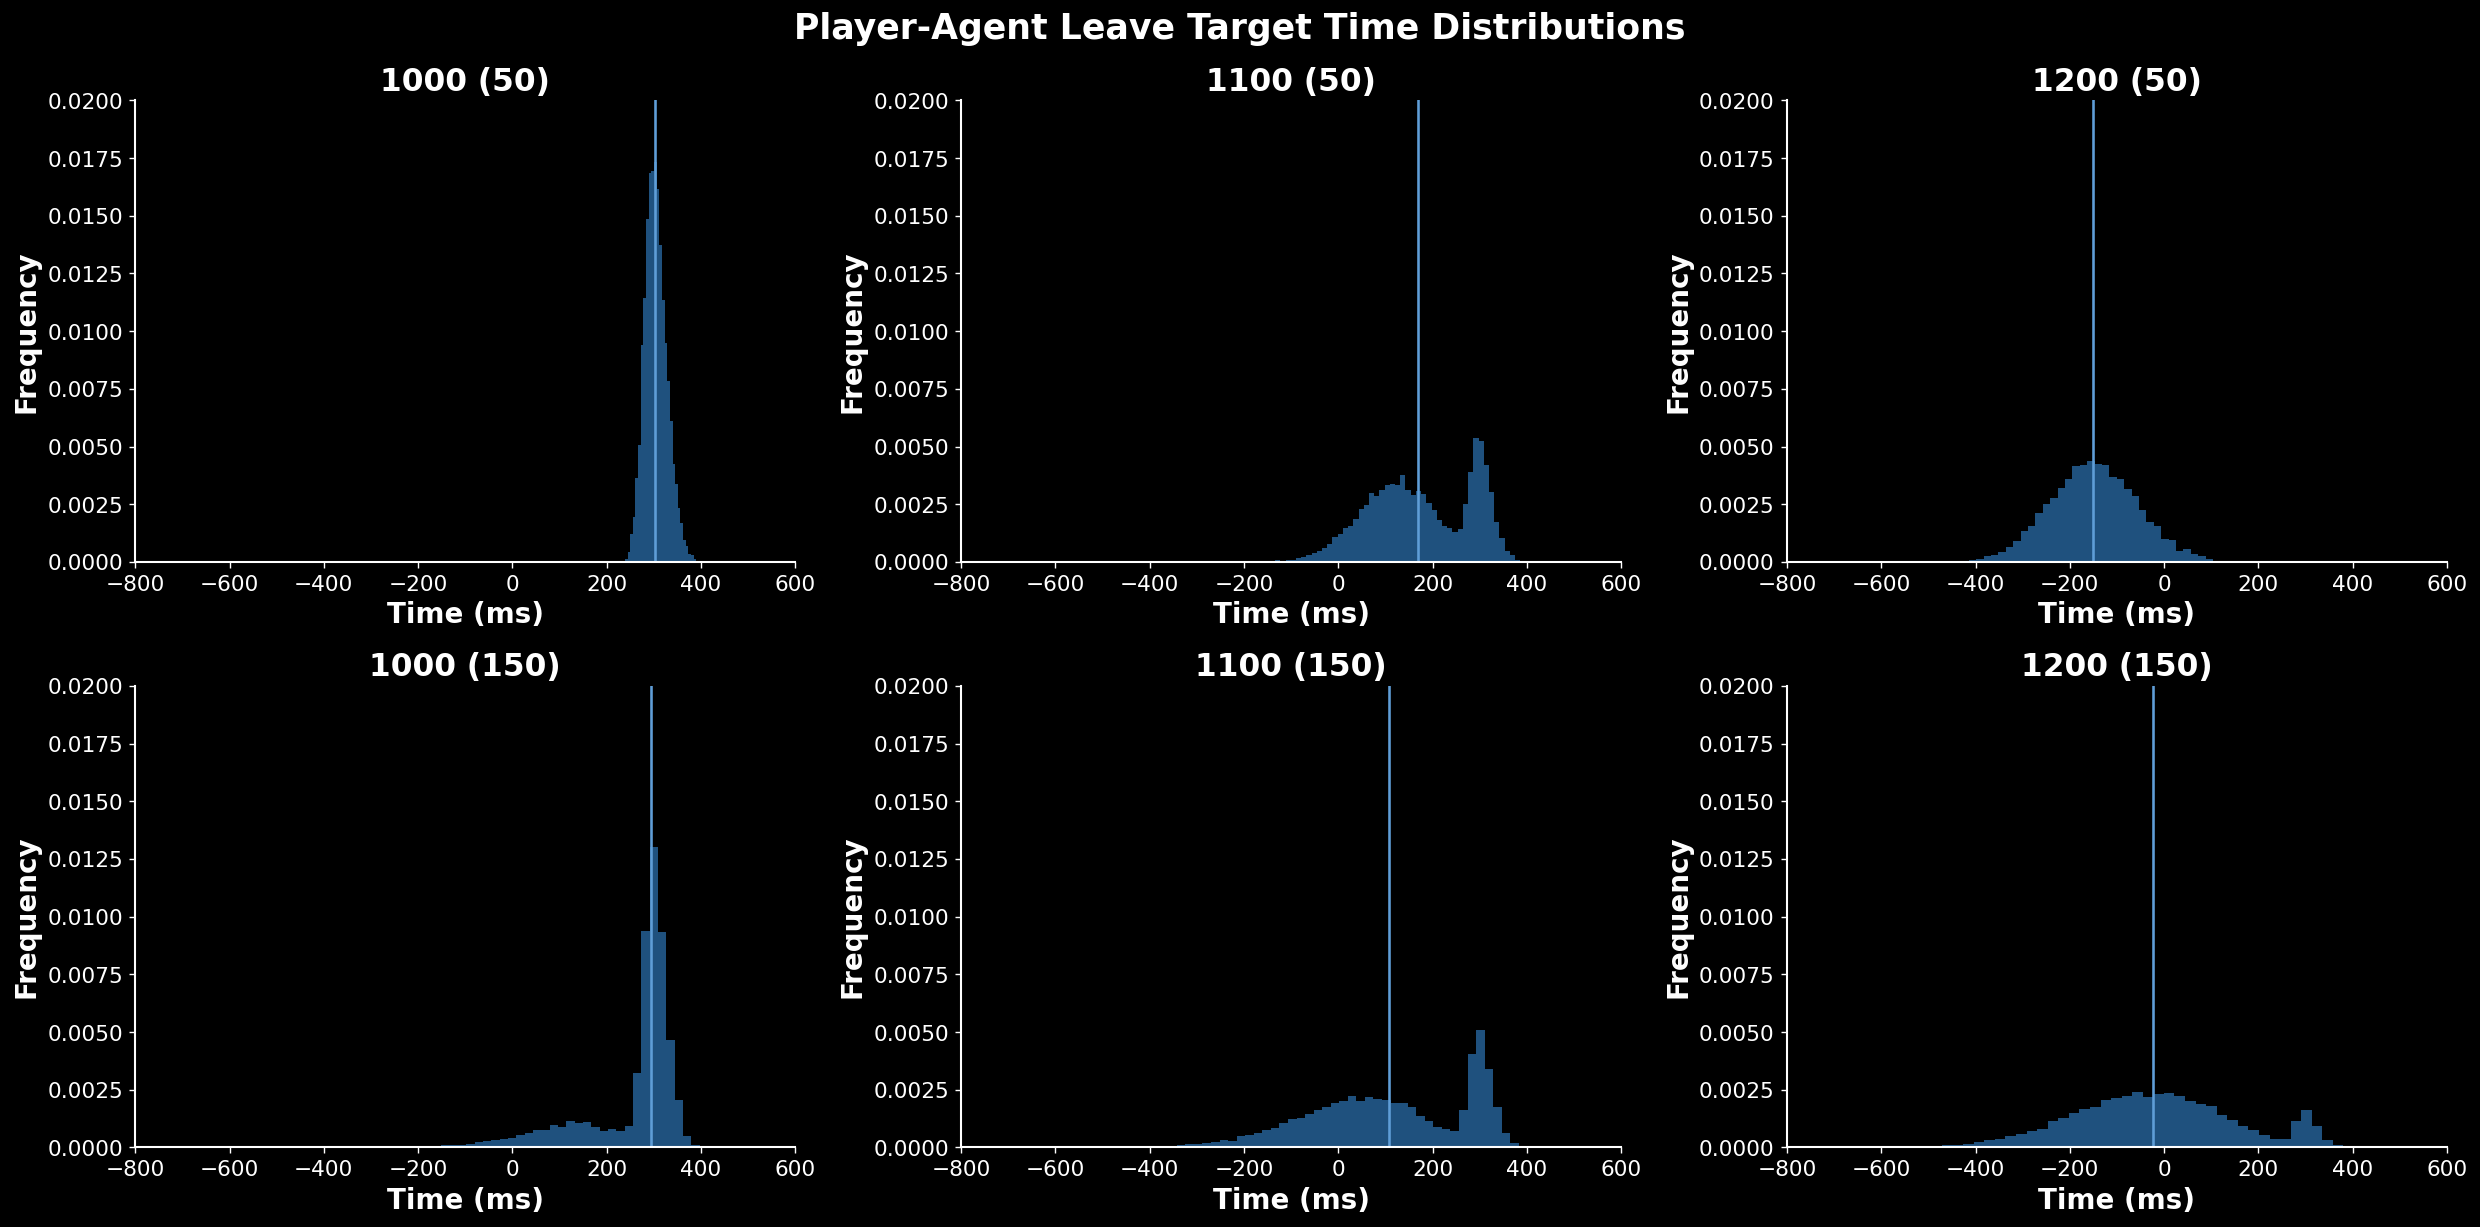

In [306]:
fig,axs = group_experiment_sim_results.plot_histogram(['Player Leave Time Minus Agent Decision Time'])
c = -1
d = 0
for j in range(num_blocks):
    c+=1
    axs[c,d].set_title(trial_block_titles[j])
    if c == 1:
        d += 1
        c = -1
plt.setp(axs, ylim=(0,0.02), xlim=(-800,600))
fig.suptitle('Player-Agent Leave Target Time Distributions')
fig.tight_layout()
if save:
    plt.savefig(SAVE_PATH+'player_minus_agent_leave_time_distributions', dpi = 400, transparent = True)
plt.show()


Pickle load Individual and Group Subject Sims (faster to just run them)

In [307]:
# if 'subject_sim_50' not in locals():
#     load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\\'
#     subnames = ['Sub1','Sub2','Sub3','Sub4','Sub5','Sub6','Sub7','Sub8','Sub9','Sub10','Sub11','Sub12']
#     subject_sim_50 = {}
#     subject_sim_150 = {}
#     for sub in subnames:
#         o1 = dill.load((open(load_path + f'{sub}_sim_sd50.pkl', 'rb')))
#         o2 = dill.load((open(load_path + f'{sub}_sim_sd150.pkl', 'rb')))
#         subject_sim_50.update({sub:o1})
#         subject_sim_150.update({sub:o2})
# if 'group_sim_50' not in locals():
#     group_sim_50 = dill.load((open(load_path + 'group_sim_sd50.pkl', 'rb')))
#     group_sim_150 = dill.load((open(load_path+'group_sim_sd150.pkl','rb')))

Plot Group

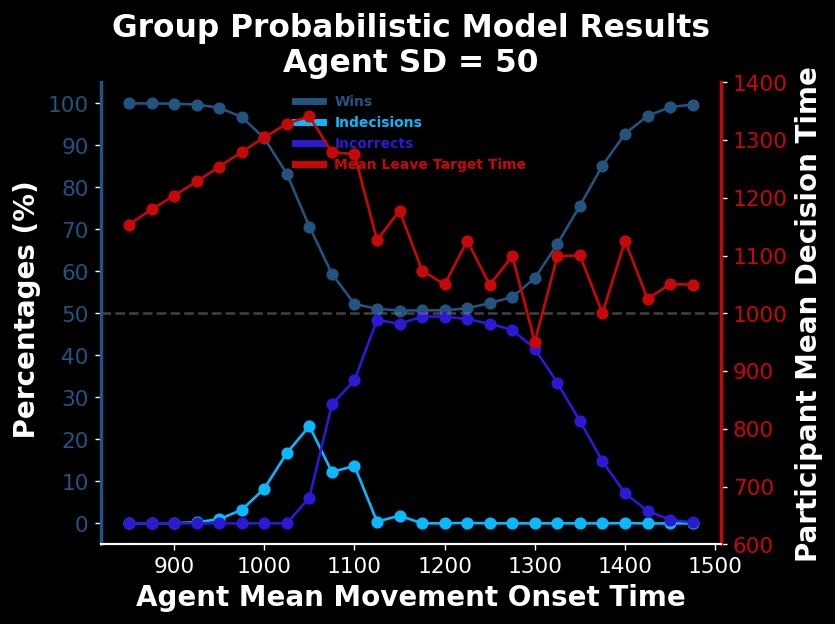

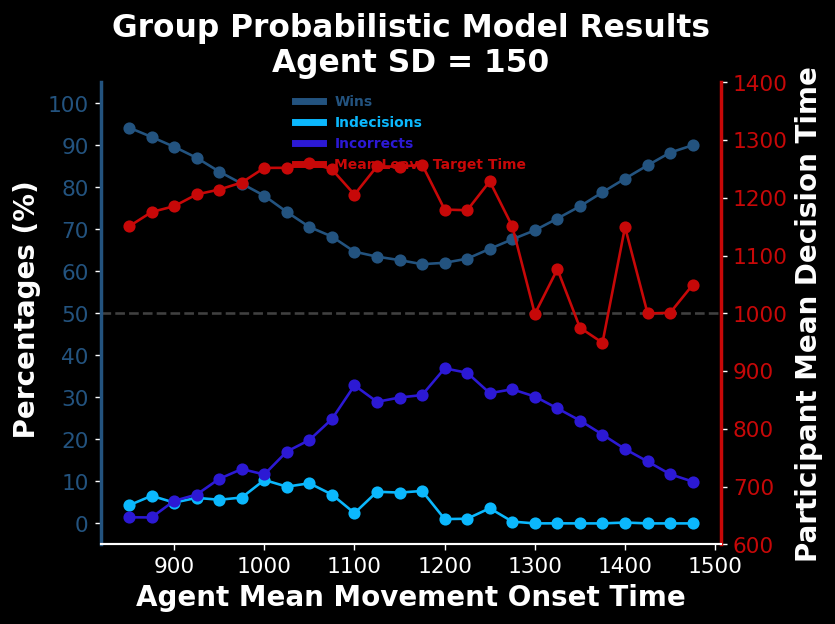

In [308]:
group_sim_50.plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])
group_sim_150.plot_optimals_all_on_one(['Wins','Indecisions','Incorrects'],['Mean Leave Target Time'])

### Plot Sims on Data

Plot decision time distributions of simulation then data

Mean Decision Time (group sim)

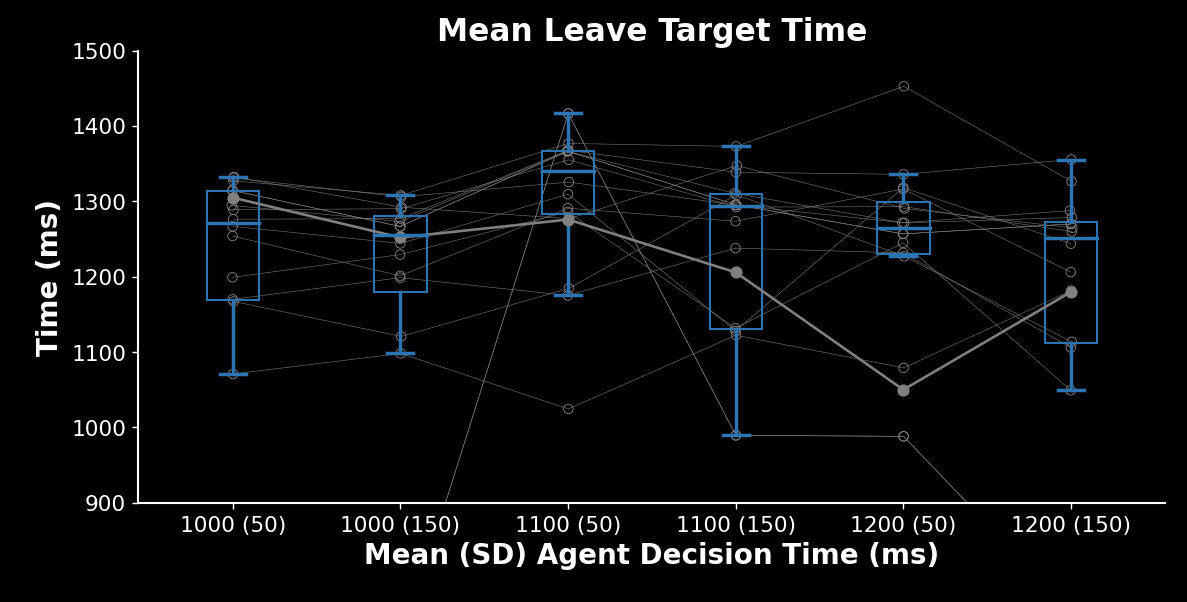

In [311]:
metric = group.combine_all_subjects('player_task_decision_time_mean') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,group_experiment_sim_results.optimal_mean_results['Mean Leave Target Time'],c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Mean Leave Target Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'mean_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
else:
    axmain.set_axis_on()
plt.show()

Median Decision Times

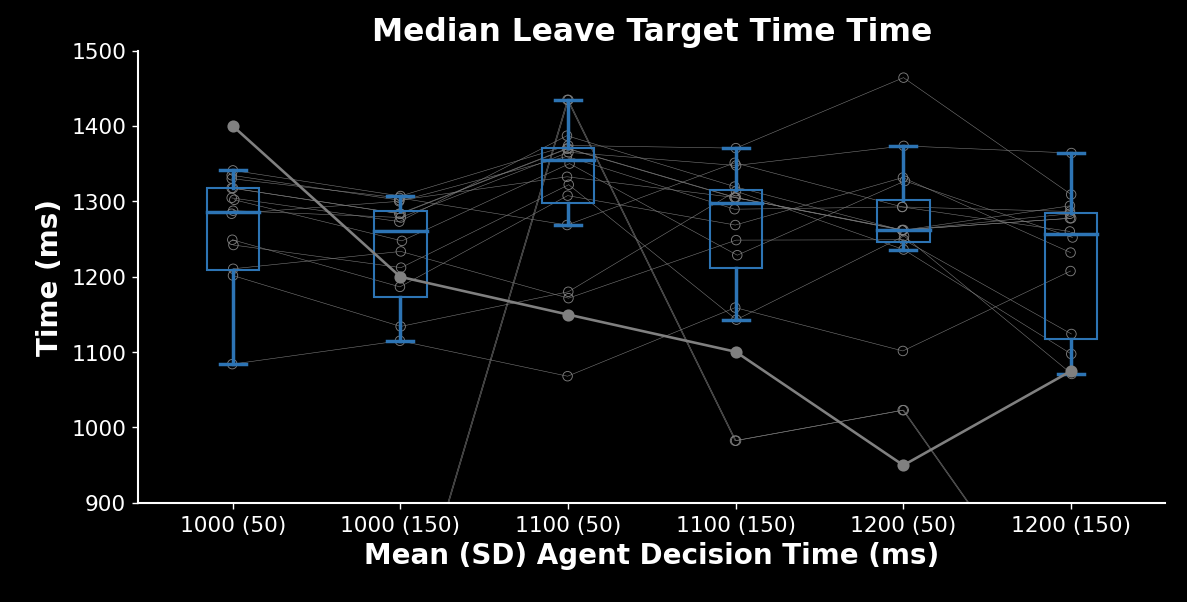

In [312]:
metric = group.combine_all_subjects('player_task_decision_time_median') 
optimal_metric = np.nanmedian(group_experiment_sim_results.optimal_trial_results['Player Decision Times'],axis=1)
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(900,1600,100)
bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')


ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Target Time Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_target_time_with_optimal_simulation', dpi = 400, transparent = True)
# else:
#     axmain.set_axis_on()
plt.show()


Player-Agent Decision Time

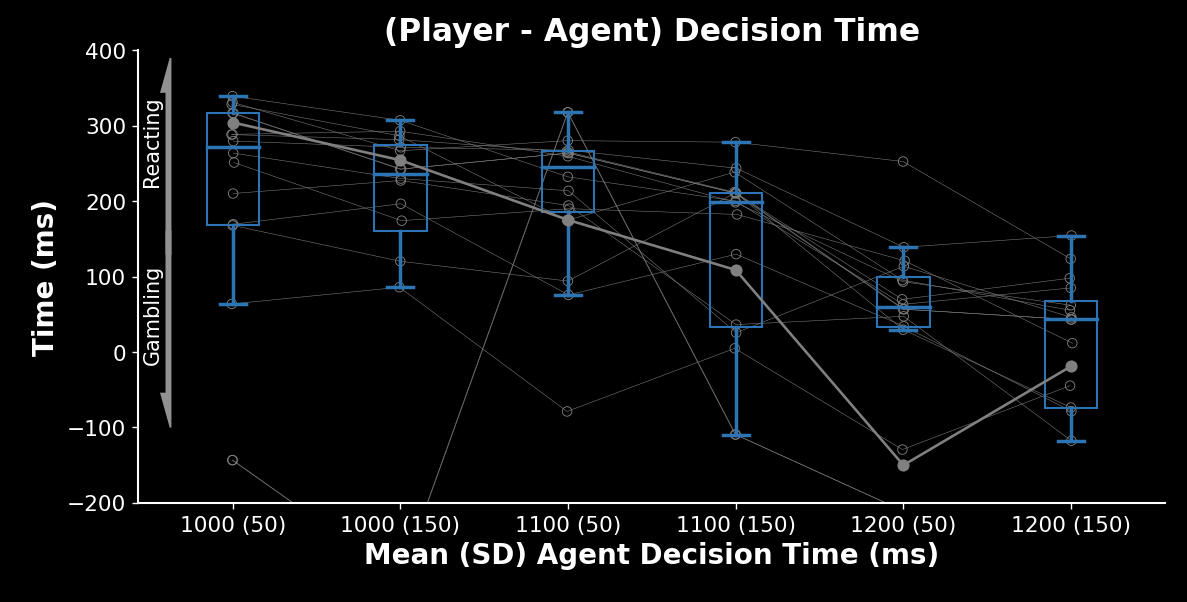

In [313]:
data_metric = group.combine_all_subjects('player_minus_agent_task_decision_time_mean') 
optimal_metric = np.nanmean(group_experiment_sim_results.optimal_trial_results['Player Leave Time Minus Agent Decision Time'],axis=1)
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(-200,500,100)
bw = 0.75
multi_boxplot(ax,data_metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=data_metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs,optimal_metric,c='grey',marker='o')
# ax.plot(xlocs, group_sim_results['Player Minus Agent Decision Time'])

ax.arrow(min(xlocs)-0.89,160,0,-(max(ylocs) - 140), width = 0.12, length_includes_head = True,head_length = 45,head_width=0.27,shape = 'left',color=wheel.grey)
ax.arrow(min(xlocs)-0.89,130,0,max(ylocs) - 140, width = 0.12, length_includes_head = True,head_length = 45,head_width=0.27,shape = 'right',color=wheel.grey,)# head_starts_at_zero=True)
ax.text(min(xlocs)-1.15,50,'Gambling',rotation=90, ha = 'center', va = 'center')
ax.text(min(xlocs)-1.15,280,'Reacting',rotation=90, ha = 'center', va = 'center')

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('(Player - Agent) Decision Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'player_minus_agent_decision_time_with_optimal_simulation', dpi = 400, transparent = True)
plt.show()

Indecisions (w/group sim)

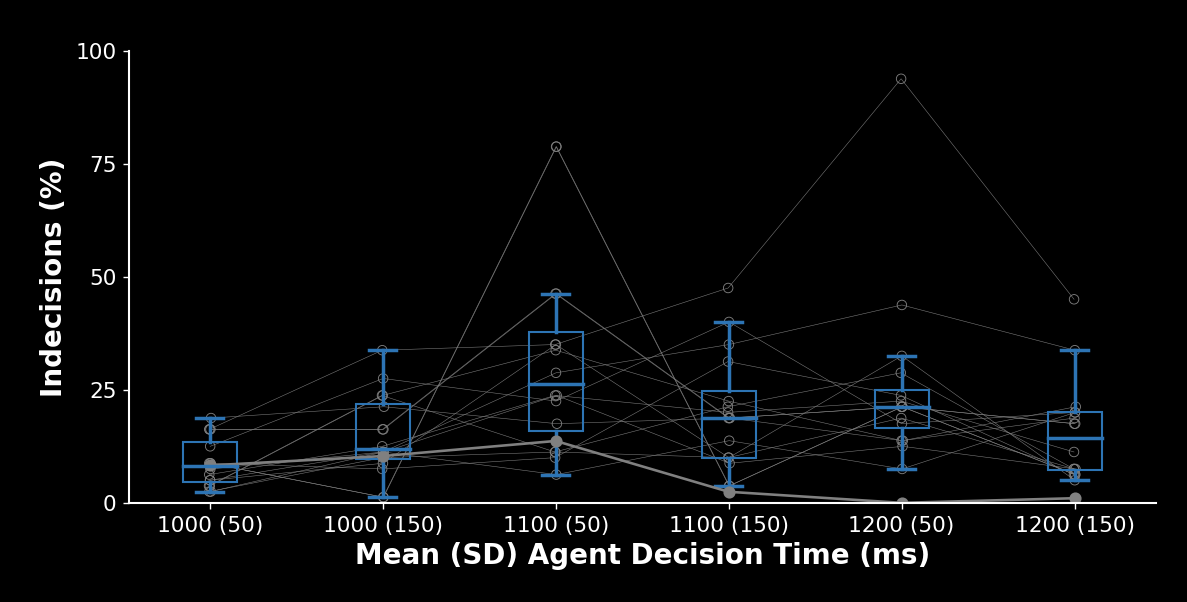

In [314]:
metric = group.combine_all_subjects('player_perc_indecisions') 
optimal_metric = group_experiment_sim_results.optimal_mean_results['Indecisions']
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions_with_optimal_simulation', dpi = 400, transparent = True)
plt.show()

Wins

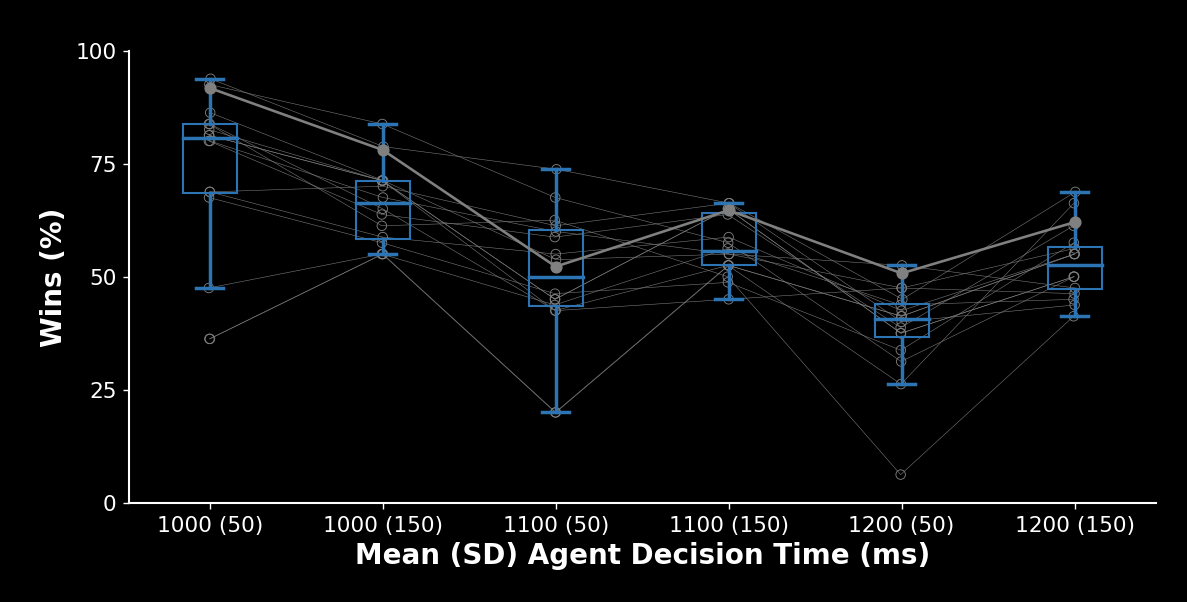

In [315]:
metric = group.combine_all_subjects('player_perc_wins') 
optimal_metric = group_experiment_sim_results.optimal_mean_results['Wins']
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'wins_with_optimal_simulation', dpi = 400, transparent = True)
plt.show()

Incorrects

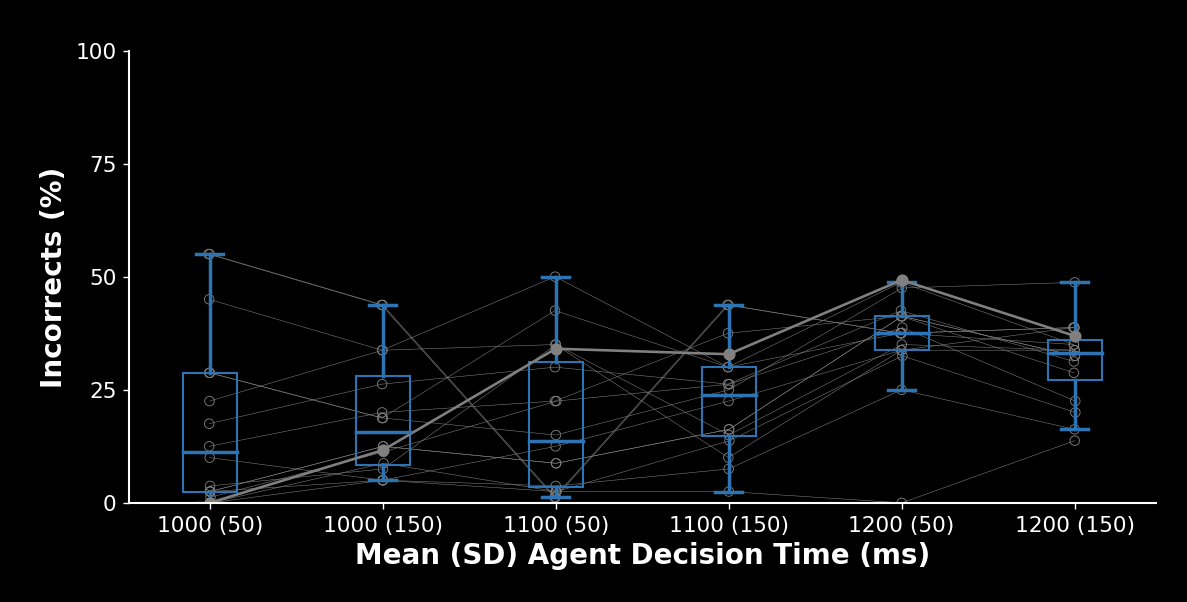

In [316]:
metric = group.combine_all_subjects('player_perc_incorrects') 
optimal_metric = group_experiment_sim_results.optimal_mean_results['Incorrects']
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Incorrects (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'incorrects_with_optimal_simulation', dpi = 400, transparent = True)
plt.show()

### Gamble and Reaction Plots

Reactiona and Gamble Decisions

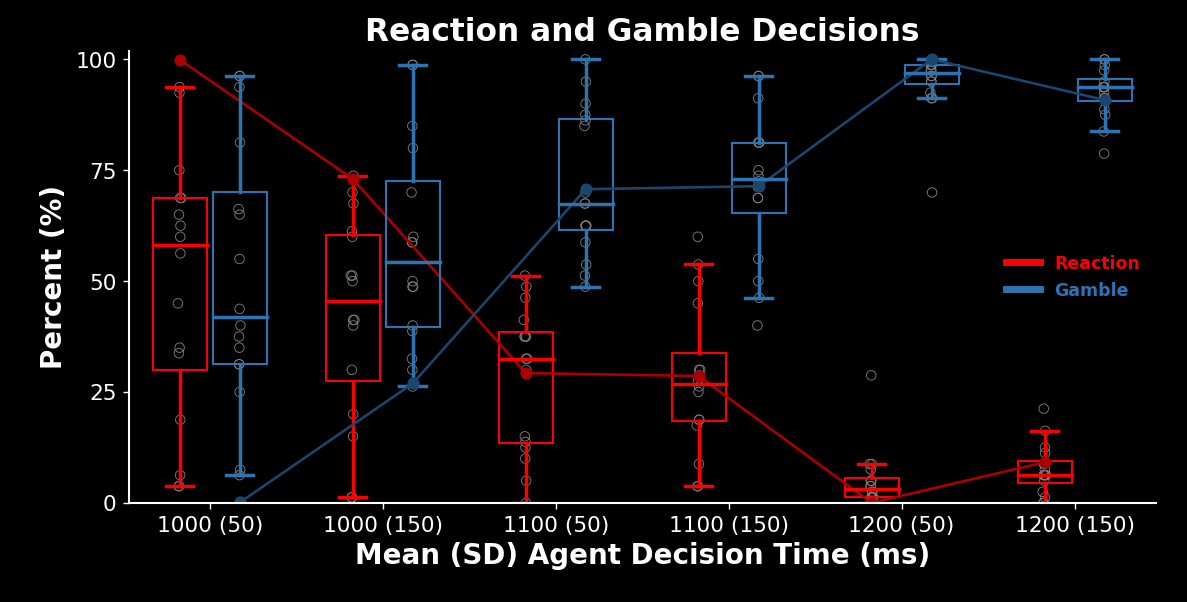

In [317]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Number of Reaction Decisions']
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Number of Gamble Decisions']
data_metric1 = group.combine_all_subjects('perc_reactions')
data_metric2 = group.combine_all_subjects('perc_gambles')

# Out of x number of reaction and gamble decisions, how many of them were indecisions
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T,lw = 0, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, lw=0,noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Decisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_decisions_with_optimal_simulation', dpi = 400, transparent = True)

plt.show()

Wins

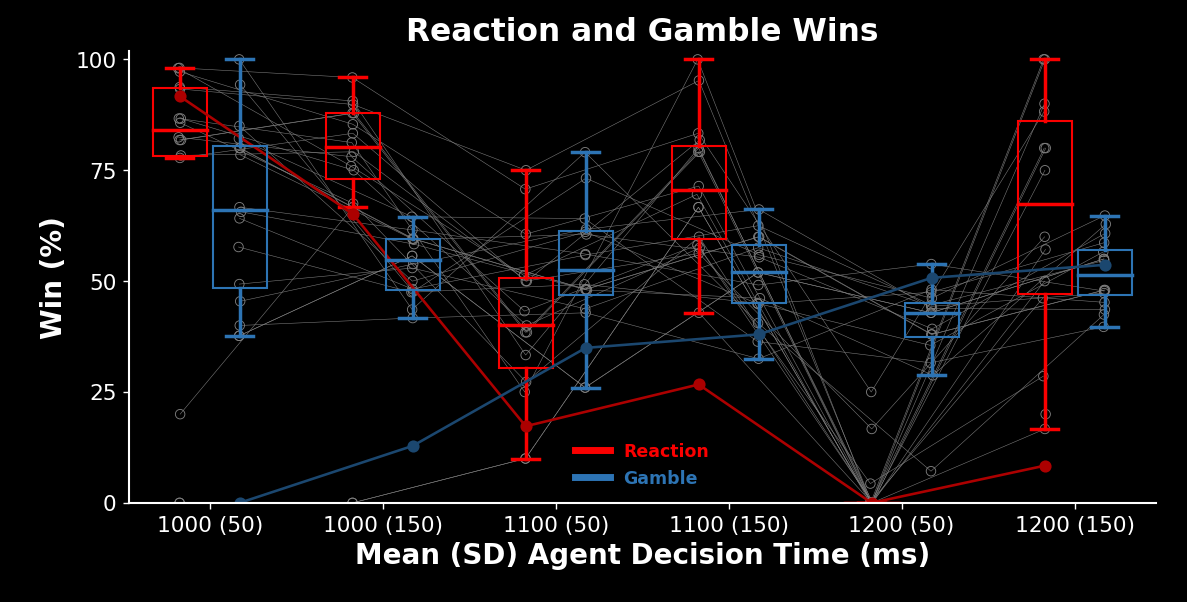

In [318]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Reaction Wins']
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Gamble Wins']
data_metric1 = group.combine_all_subjects('perc_reaction_wins')
data_metric2 = group.combine_all_subjects('perc_gamble_wins')

# Out of x number of reaction and gamble decisions, how many of them were wins
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Win (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Wins')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_wins', dpi = 400, transparent = True)

plt.show()

Reactions and Gamble Indecisions

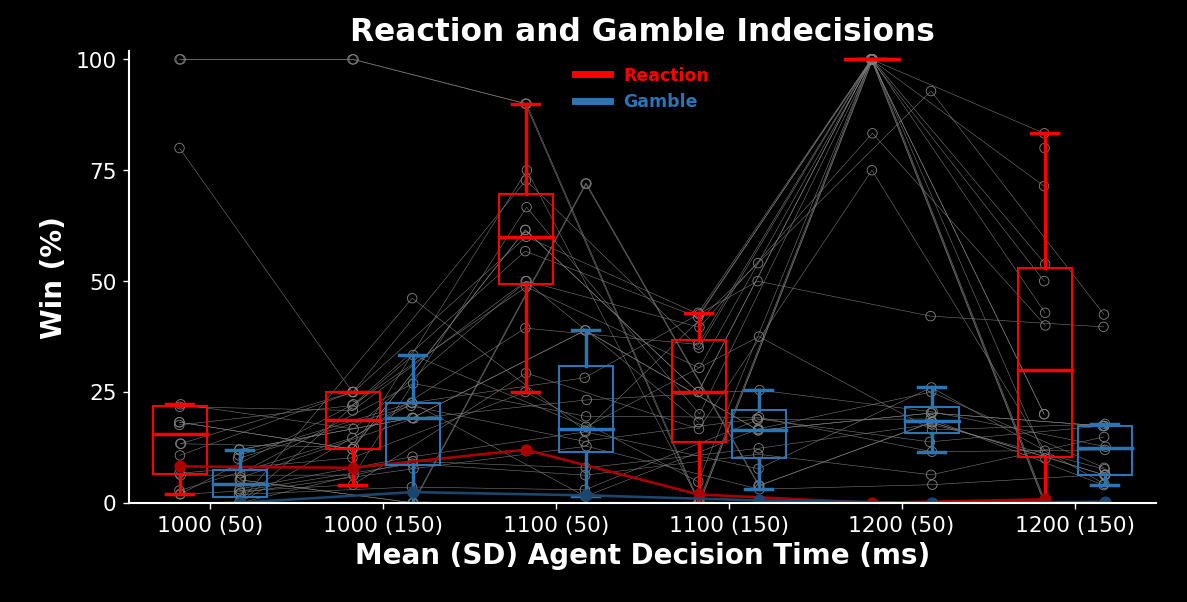

In [319]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Reaction Indecisions'] 
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Gamble Indecisions']
data_metric1 = group.combine_all_subjects('perc_reaction_indecisions')
data_metric2 = group.combine_all_subjects('perc_gamble_indecisions')

# Out of x number of indecisions, how many of them were reaction and gambles
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Win (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Reaction and Gamble Indecisions')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_wins', dpi = 400, transparent = True)

plt.show()

Number of Wins that were reaction and gamble

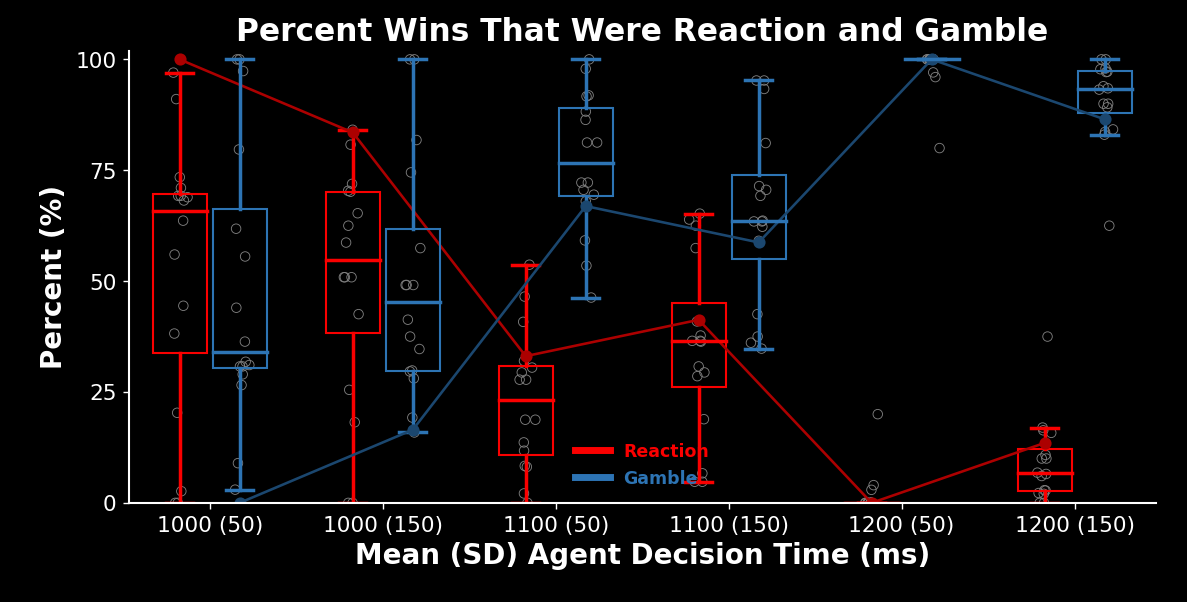

In [326]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Perc Wins That Were Reaction'] 
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Perc Wins That Were Gamble'] 
data_metric1 = group.combine_all_subjects('perc_wins_that_were_reactions')
data_metric2 = group.combine_all_subjects('perc_wins_that_were_gambles')

# Out of x number of indecisions, how many of them were reaction and gambles
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

for j in range(num_blocks):     
    m = np.array([xlocs[j],xlocs[j]])
    x_pos = m + np.array([-bw/1.75,bw/1.75])
    dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],data_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 0)


ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Wins That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_wins', dpi = 400, transparent = True)

plt.show()

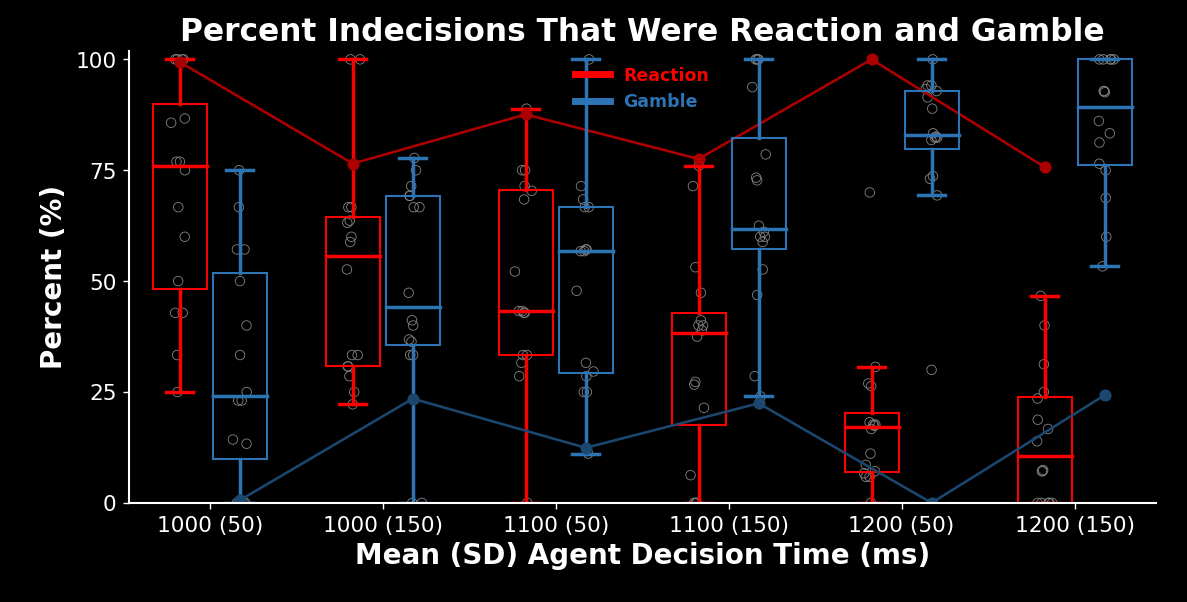

In [327]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Perc Indecisions That Were Reaction'] 
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Perc Indecisions That Were Gamble'] 
data_metric1 = group.combine_all_subjects('perc_indecisions_that_were_reactions')
data_metric2 = group.combine_all_subjects('perc_indecisions_that_were_gambles')

# Out of x number of indecisions, how many of them were reaction and gambles
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

for j in range(num_blocks):     
    m = np.array([xlocs[j],xlocs[j]])
    x_pos = m + np.array([-bw/1.75,bw/1.75])
    dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],data_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 0)


ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Indecisions That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_wins', dpi = 400, transparent = True)

plt.show()

In [334]:
(0.0).is_integer()

True

In [338]:
group_sim_150.final_results_dict['Perc Incorrects That Were Gamble'] 

array([[100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
        100., 100., 1

In [341]:
np.array([0.,100.])/0

C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_4124\3323518445.py:1: RuntimeWarning: divide by zero encountered in divide
  np.array([0.,100.])/0
C:\Users\Seth Sullivan\AppData\Local\Temp\ipykernel_4124\3323518445.py:1: RuntimeWarning: invalid value encountered in divide
  np.array([0.,100.])/0


array([nan, inf])

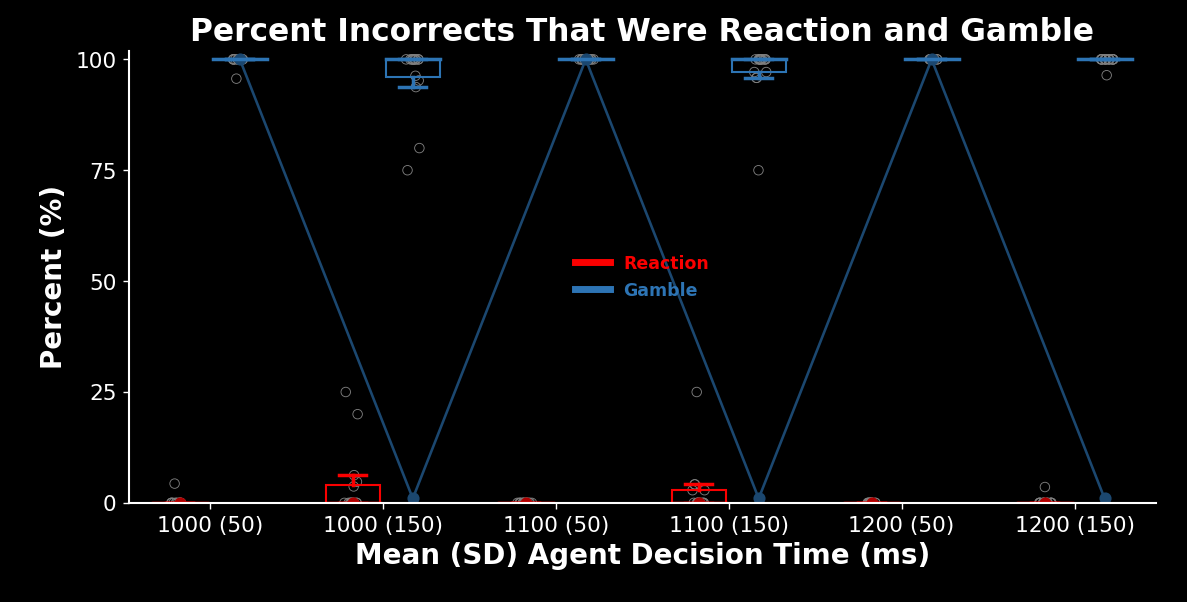

In [328]:
optimal_metric1 = group_experiment_sim_results.optimal_mean_results['Perc Incorrects That Were Reaction'] 
optimal_metric2 = group_experiment_sim_results.optimal_mean_results['Perc Incorrects That Were Gamble'] 
data_metric1 = group.combine_all_subjects('perc_incorrects_that_were_reactions')
data_metric2 = group.combine_all_subjects('perc_incorrects_that_were_gambles')

# Out of x number of indecisions, how many of them were reaction and gambles
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)


bw = 0.75
multi_boxplot(ax,data_metric1,xlocs=xlocs-bw/1.8,box_width = bw,colors = wheel.seth_red)
# dv.jitter_array(ax=ax,x_positions=xlocs-bw/1.8,data_list=data_metric1.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs-bw/1.8,optimal_metric1,'-o', color = wheel.lighten_color(wheel.seth_red,1.3))

multi_boxplot(ax,data_metric2,xlocs=xlocs+bw/1.8,box_width = bw,colors=wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs+bw/1.8,data_list=data_metric2.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs+bw/1.8,optimal_metric2,'-o', color = wheel.lighten_color(wheel.seth_blue,1.3))

for j in range(num_blocks):     
    m = np.array([xlocs[j],xlocs[j]])
    x_pos = m + np.array([-bw/1.75,bw/1.75])
    dv.jitter_array(ax=ax,x_positions=x_pos,data_list=[data_metric1[:,j],data_metric2[:,j]], noise_scale=0.05, include_mean = False, circle_size=30, linewidth = 0)


ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)

ax.set_ylim(0,102)
ax.set_xticks(xlocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_title('Percent Incorrects That Were Reaction and Gamble')
labels = ['Reaction','Gamble']
colors = [wheel.seth_red,wheel.seth_blue]
dv.Custom_Legend(ax,labels,colors,fontsize=10)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'reaction_and_gamble_wins', dpi = 400, transparent = True)

plt.show()